In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.shape

(400, 9)

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [9]:
x = df.drop('Chance of Admit ',axis =1)
y = df['Chance of Admit ']

In [10]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [11]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:
y = y.astype('int')

In [15]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [18]:
#Cross Validation

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size=0.25)

In [19]:
x_train.shape

(300, 8)

In [20]:
x_test.shape

(100, 8)

In [21]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
classifier = DecisionTreeClassifier(random_state=0)

In [24]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
y_pred = classifier.predict(x_test)

In [29]:
result = pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

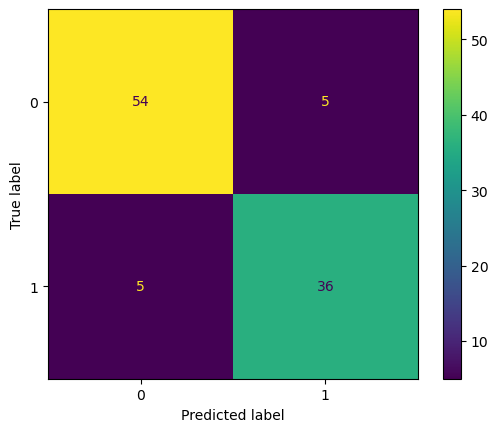

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [38]:
#TO SEE IF WE WILL GET ADMISSION OR NOT
new = [[136,314,109,4,3.5,4.0,8.77,1]]
classifier.predict(new)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

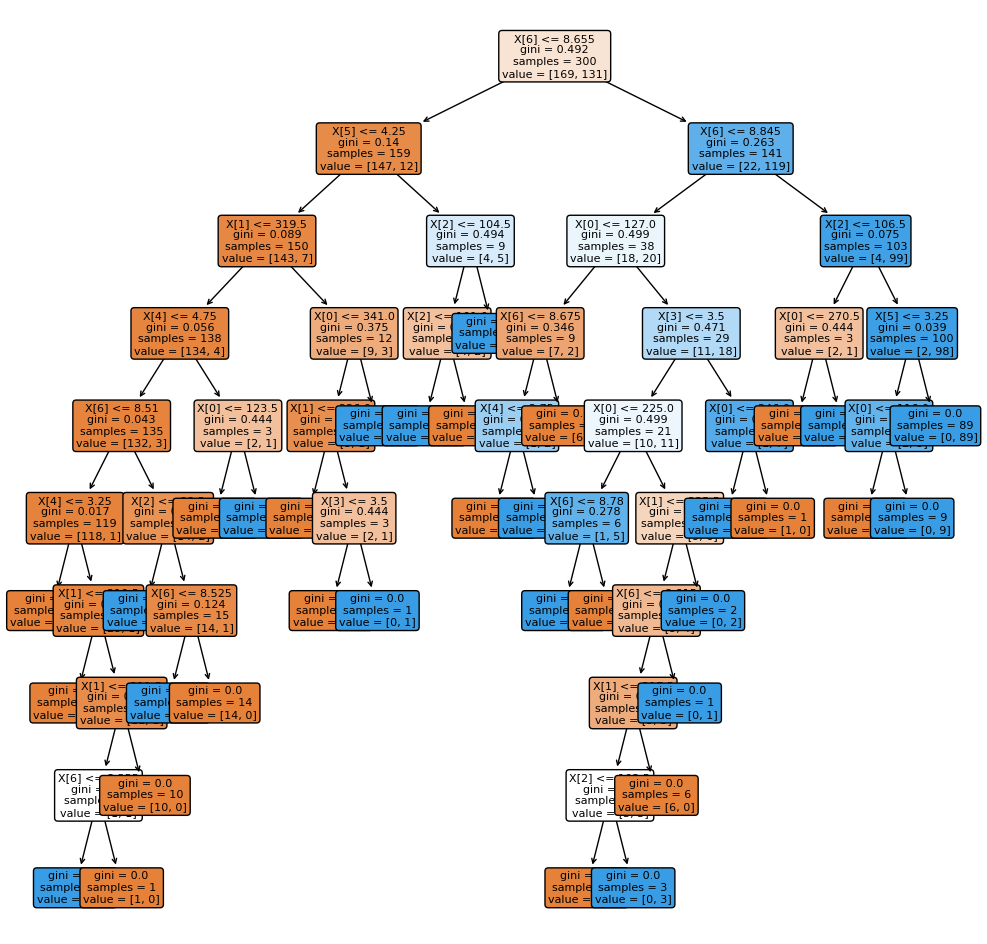

In [41]:
#DECISION TREE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True);